# Logistic Regression

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (7,4)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', None)
#pd.set_option('display.float_format', lambda x: '%.3f' % x)
#pd.options.display.float_format = '{:.3f}'.format

In [3]:
df=pd.read_csv("diabetes.csv")

In [3]:
df.head()

# 1 şeker hastası olanlar, 0 şeker hastası olmayanlar. Amacımız şeker hastalarını tespit etmek olduğundan hedef labelımızı
# 1 olarak seçtik.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

## Exploratory Data Analysis and Visualization

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe().T
# insulin std meanden cok buyuk, acaba outlier olabilir mi? kontrol edelim ilerde

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [8]:
df.Outcome.value_counts()

# classificationda ilk basta target labelin value_countsuna bakmaliyiz. balanced ve imbalanced durumunda degisecek yapacaklarimiz
# Classification problemlerinde sıklıkla karşılaşılan problemlerden biri de inbalanced datalardır. Sayısı az olan classın doğal
# olarak gözlem sayısı da az olduğundan modelin bu gözlemlerden yapabildiği öğrenme, sayısı çok olan sınıfa nazaran genellikle
# daha zayıf kalmakta ve ilgili classa ait scorlar daha düşük çıkabilmektedir.

# Az olan classın scorlarını düzeltmek/dengelemek için yapılabilecek işlemlerin detayına aşağıda gireceğiz.

# ÖNEMLİ NOT: imbalanced olan tüm datalarda az olan classın scorları kötü çıkmaz. Bazı datalarda az olan classların skorları da
# çok iyi çıkabilir. Data az olmasına rağmen classı çok iyi tanımladığından az olan veriler bile eğitim için yeterli olabilir.
# Bu durumlarda az olan classın scorlarını düzeltmeye/dengelemeye gerek yoktur.

0    500
1    268
Name: Outcome, dtype: int64

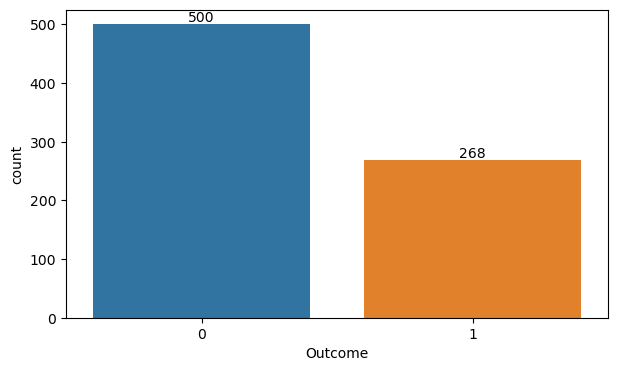

In [9]:
ax = sns.countplot(x='Outcome', data=df)
ax.bar_label(ax.containers[0]);
# imbalance gorunuyor su an

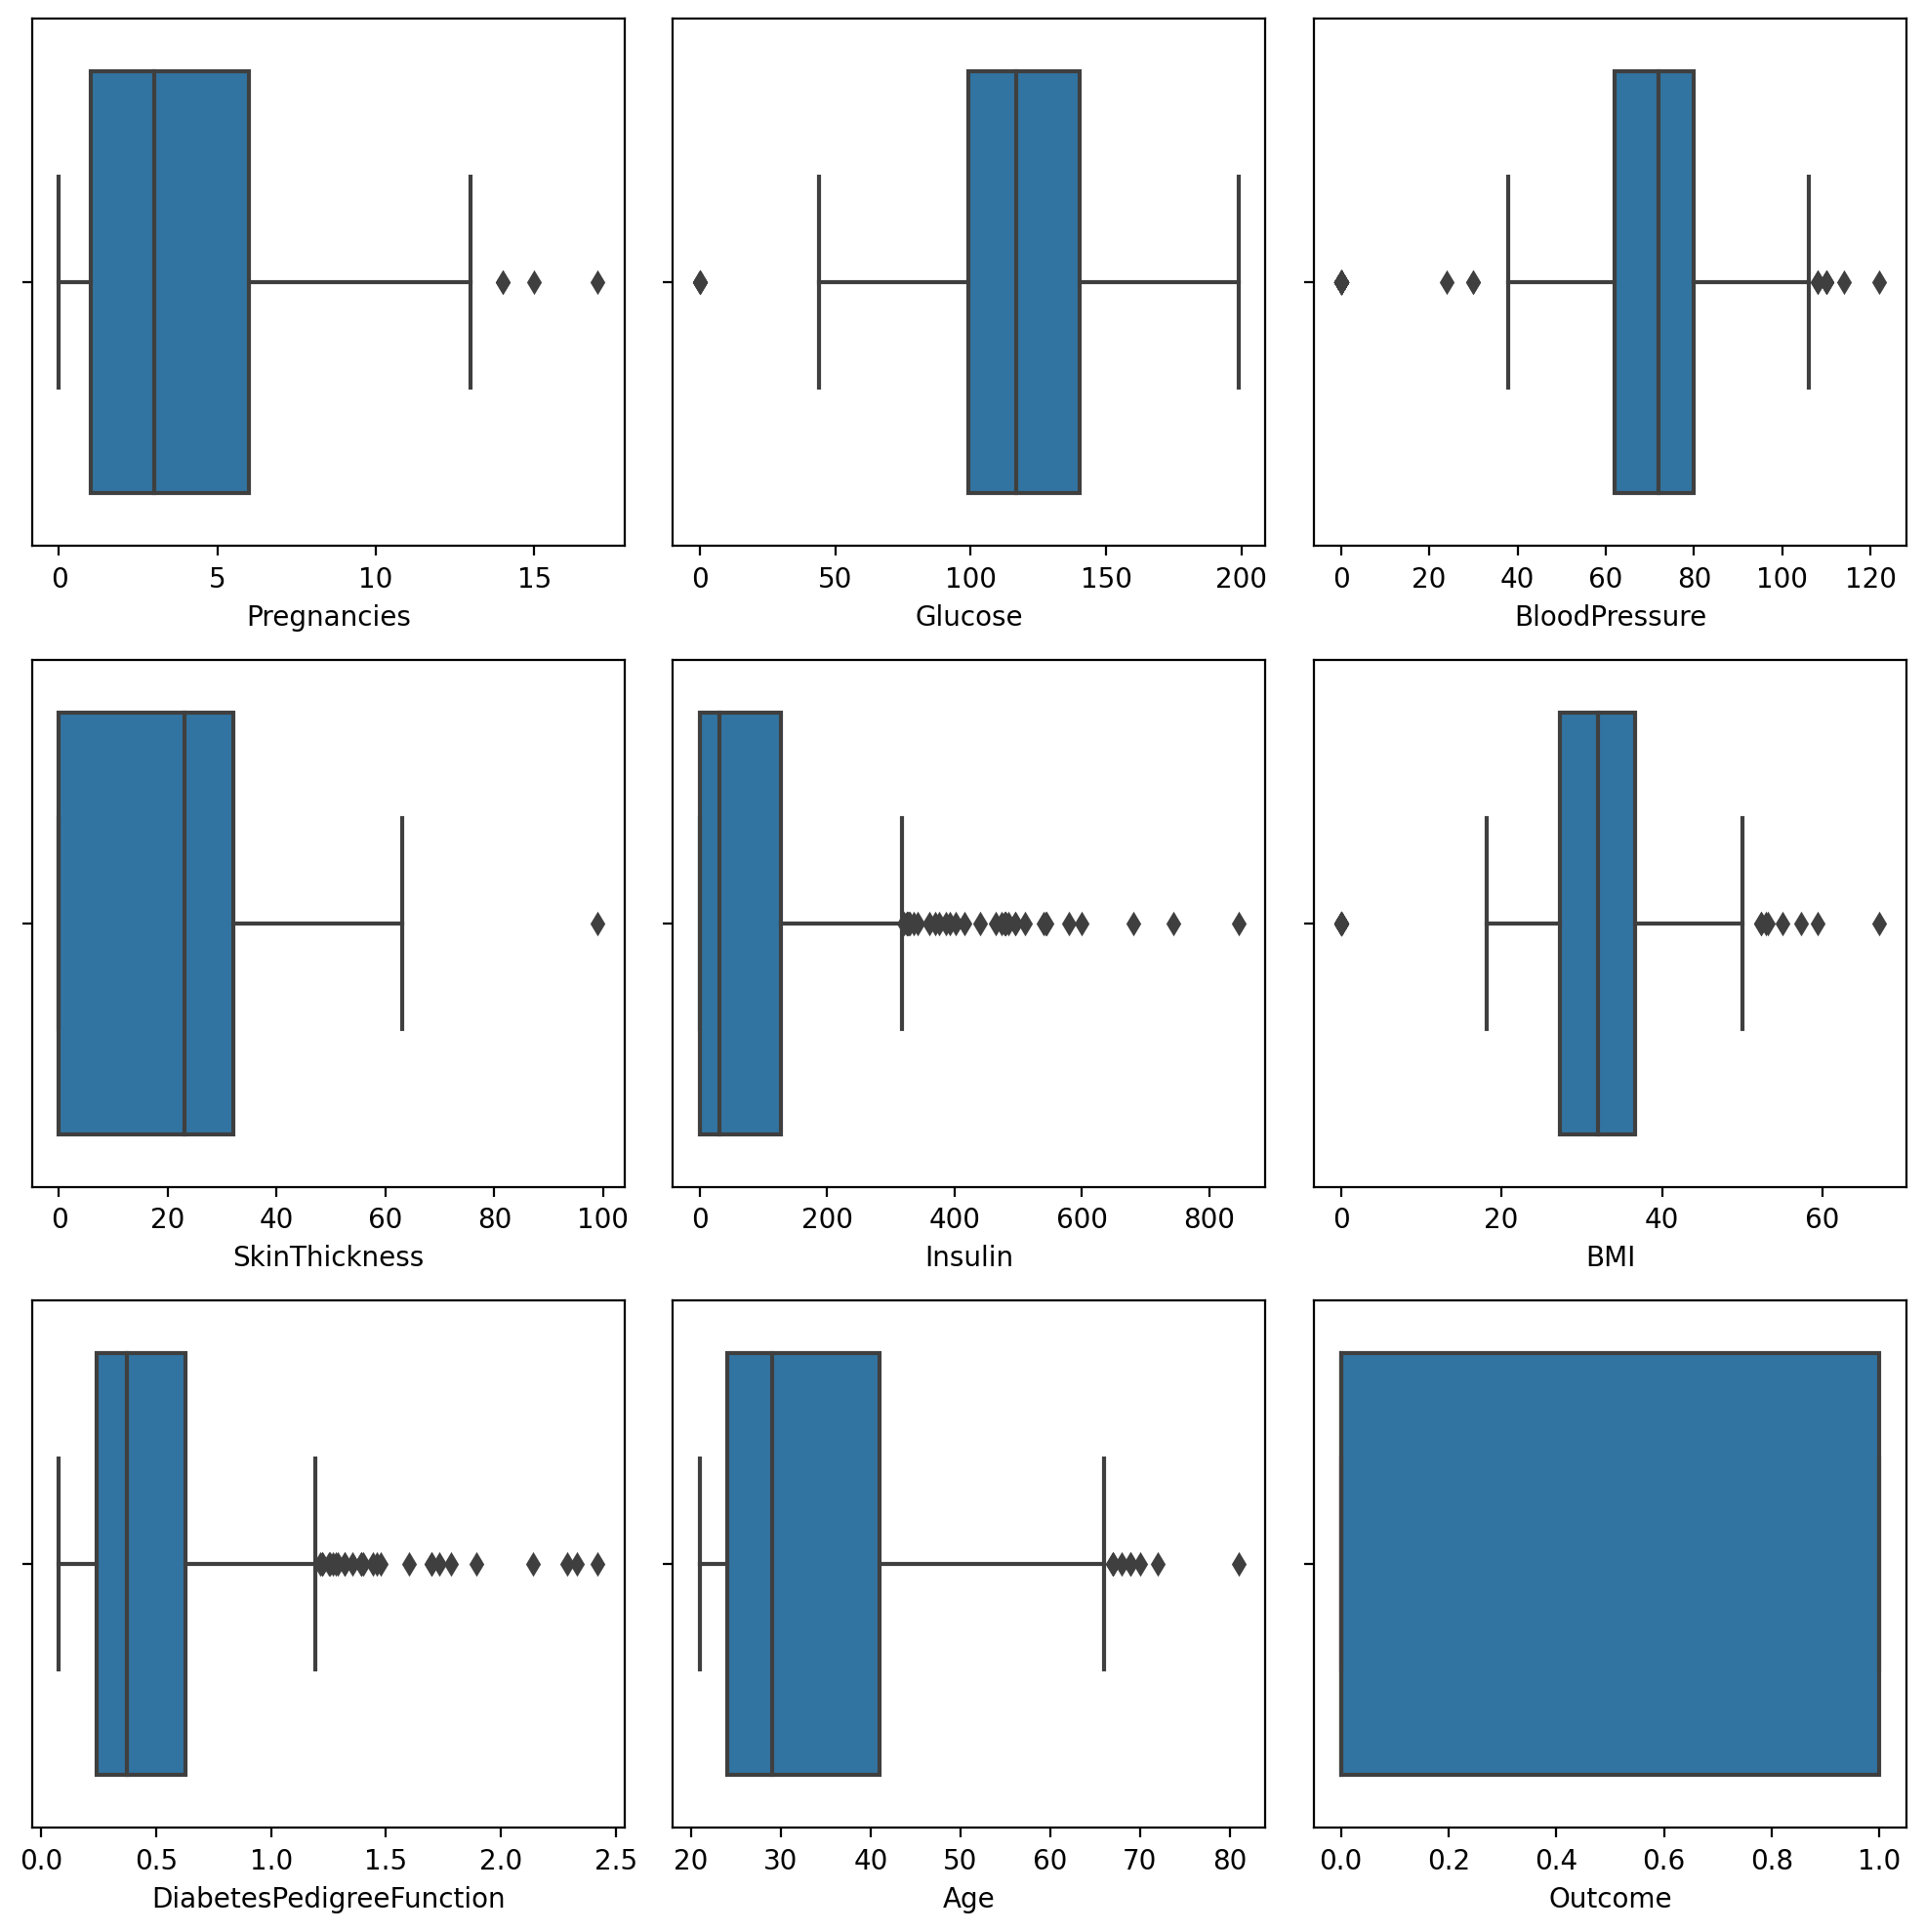

In [10]:
# outlier kontrolü
fig = plt.figure(figsize=(10,10), dpi=200)

for i, col in enumerate(df.select_dtypes(["float", "int"]).columns):
        plt.subplot(3,3,i+1)
        ax = sns.boxplot(x=df[col])
        
plt.tight_layout();
# sadece boxplotlarda su outlierdir diyemeyiz. kendi icinde degrlendiremliyiz bir de asagideki gibi

In [11]:
df=df[df.SkinThickness<70]

# domain knowledgea gore deri kalınlığı 70mm üstünde olamayacağından 70mm üstü değerleri temizliyoruz.

In [12]:
df=df[df.Glucose>0]

# glucose değeri 0 olamayacağı için sıfır ve küçük olan değerleri temizliyoruz.

In [13]:
df=df[df.BloodPressure>35]

# Bir insandaki kan basıncı 35'in altına düşemeyeceği için 35 altındaki değerleri temizliyoruz.

In [14]:
df=df[df.BMI>0]

# vücut kütle indexi 0 olamayacağı için 0 değerini temizliyoruz.

In [15]:
df.shape

(720, 9)

In [16]:
df.Outcome.value_counts()

0    473
1    247
Name: Outcome, dtype: int64

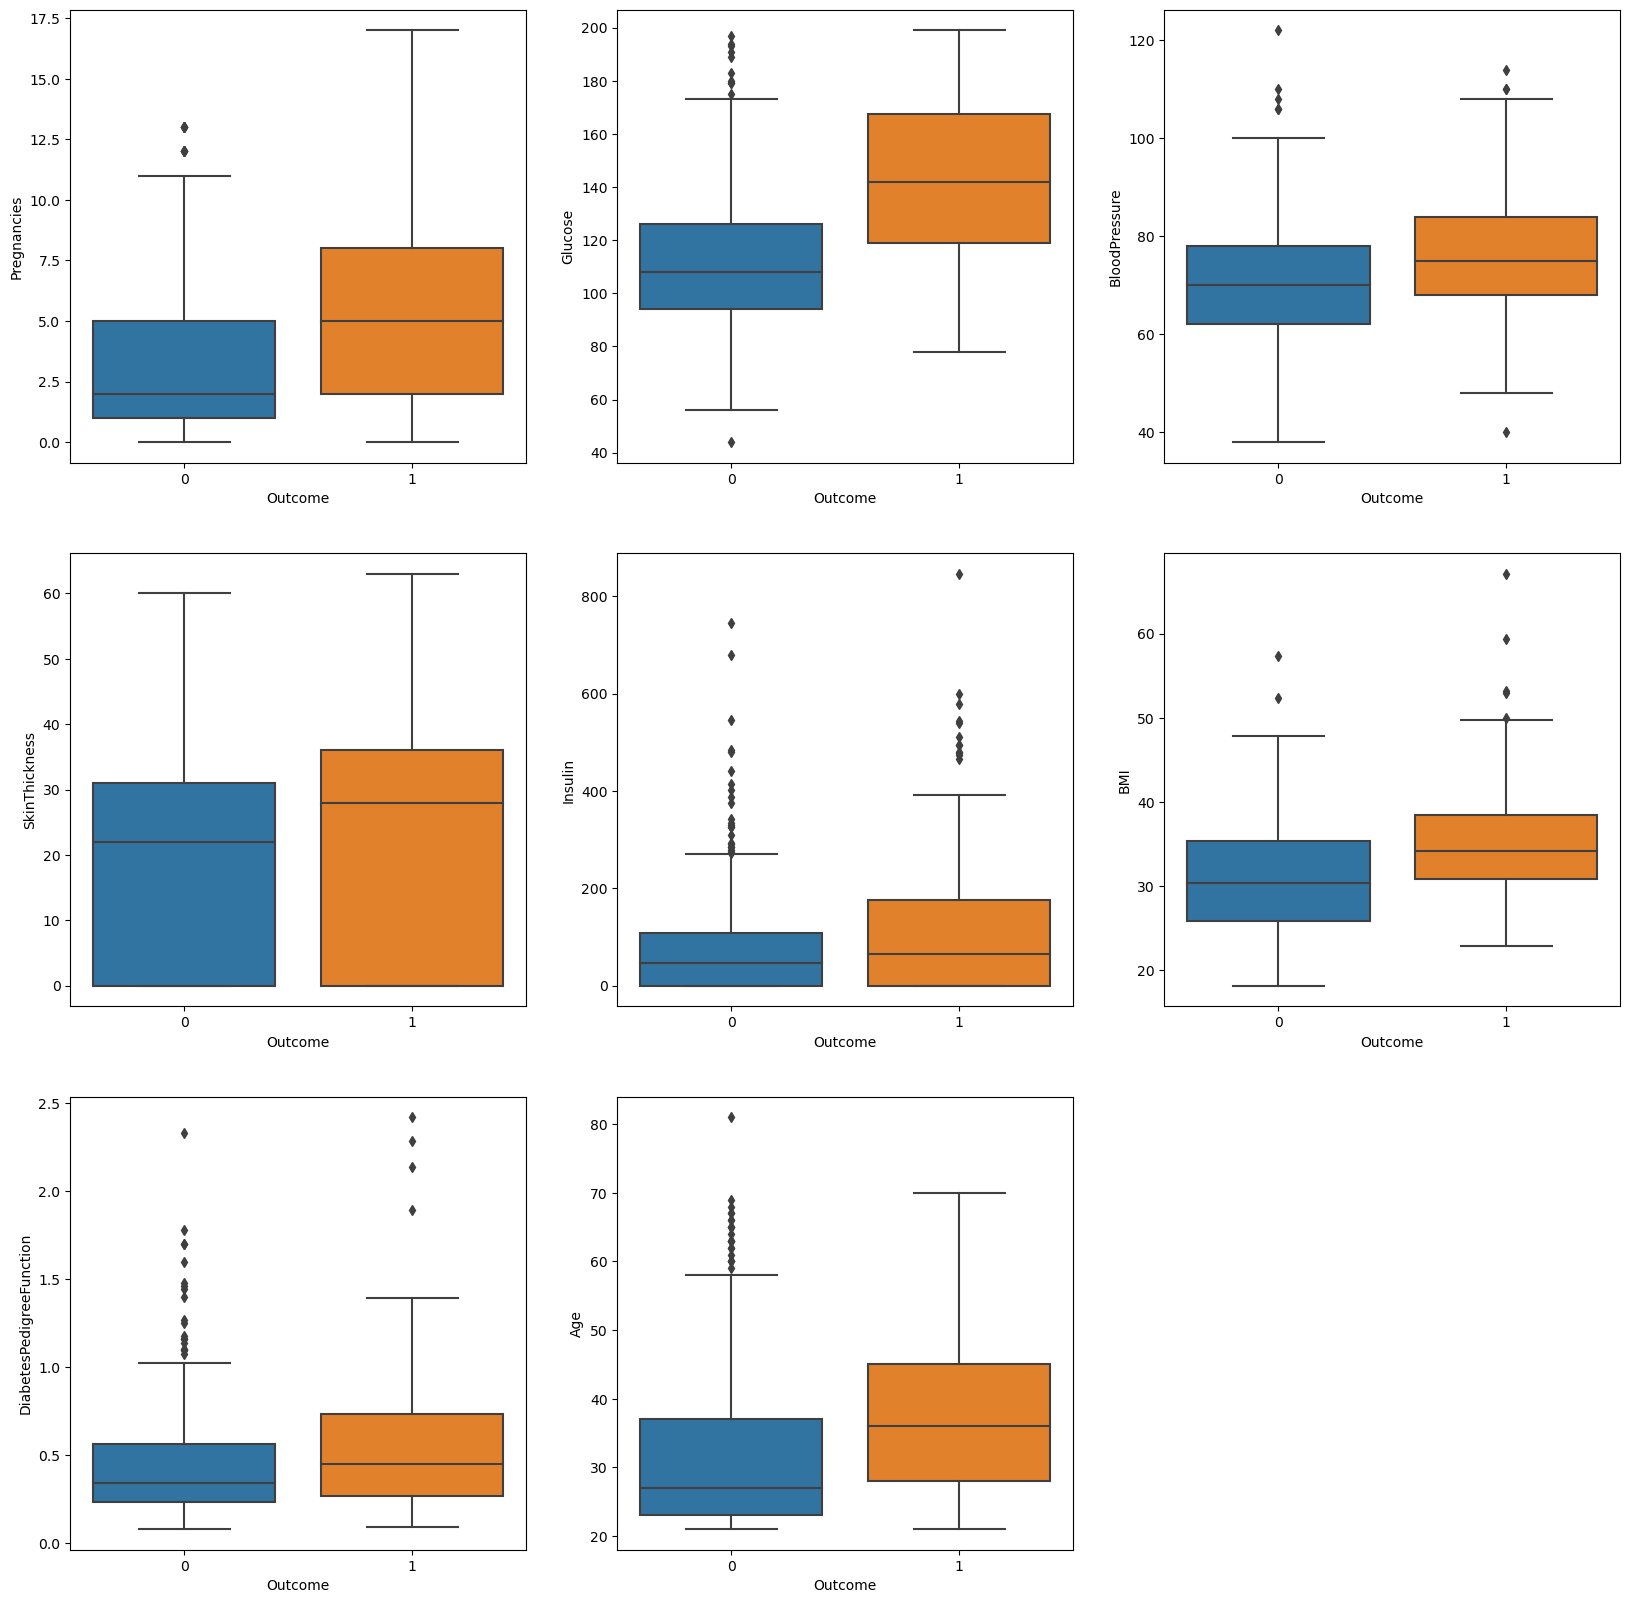

In [17]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "Outcome":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='Outcome',y=feature, data=df)
        
# tüm featureların targete göre boxplotlarına bakıyoruz. Boxplotlardan da görüleceği üzere şeker hastalığında en ayırt
# edici featuren glucose sonra ise yaş olduğunu görebiliyoruz

# hamilelerde hamile olmayanlara gore diabet olma daha yukse
# glucoseu yuksek olanlarin olmas ihtimali yuksek
# bloodpressure diabetli hasta ayirt etmede cok etkin bir feature gibi gorunmuyor..... hepsi busekilde commentle


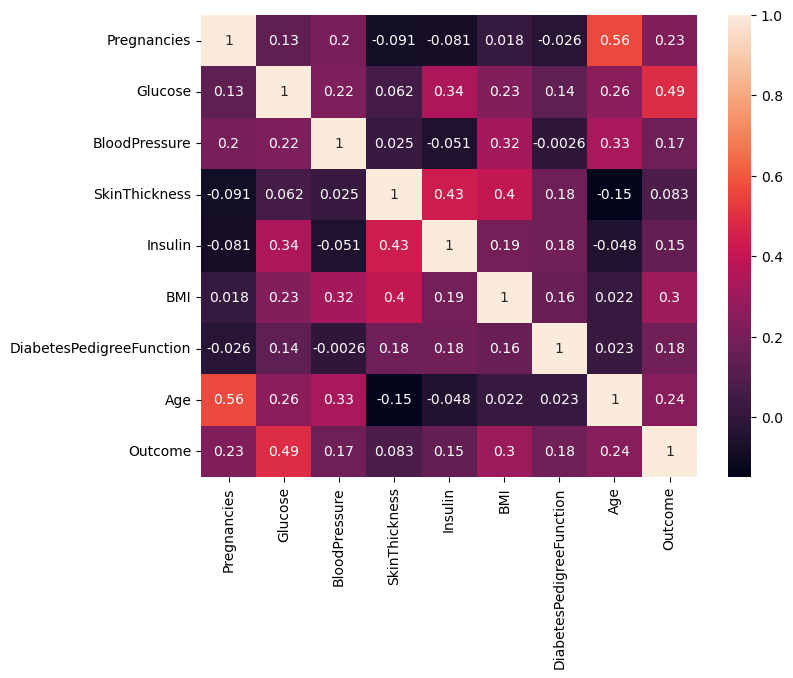

In [18]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True);

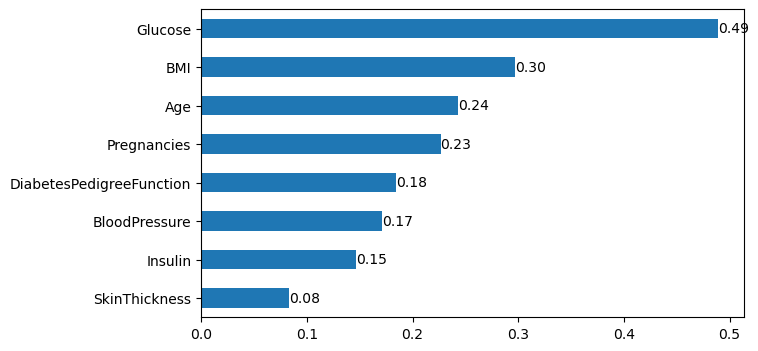

In [19]:
ax = df.corr()["Outcome"].drop("Outcome").sort_values().plot.barh()
ax.bar_label(ax.containers[0], fmt='%.2f');

# corr baktığımızda target ile en yüksek ilişkisi olan featuren glucose olduğunu görebiliyoruz.

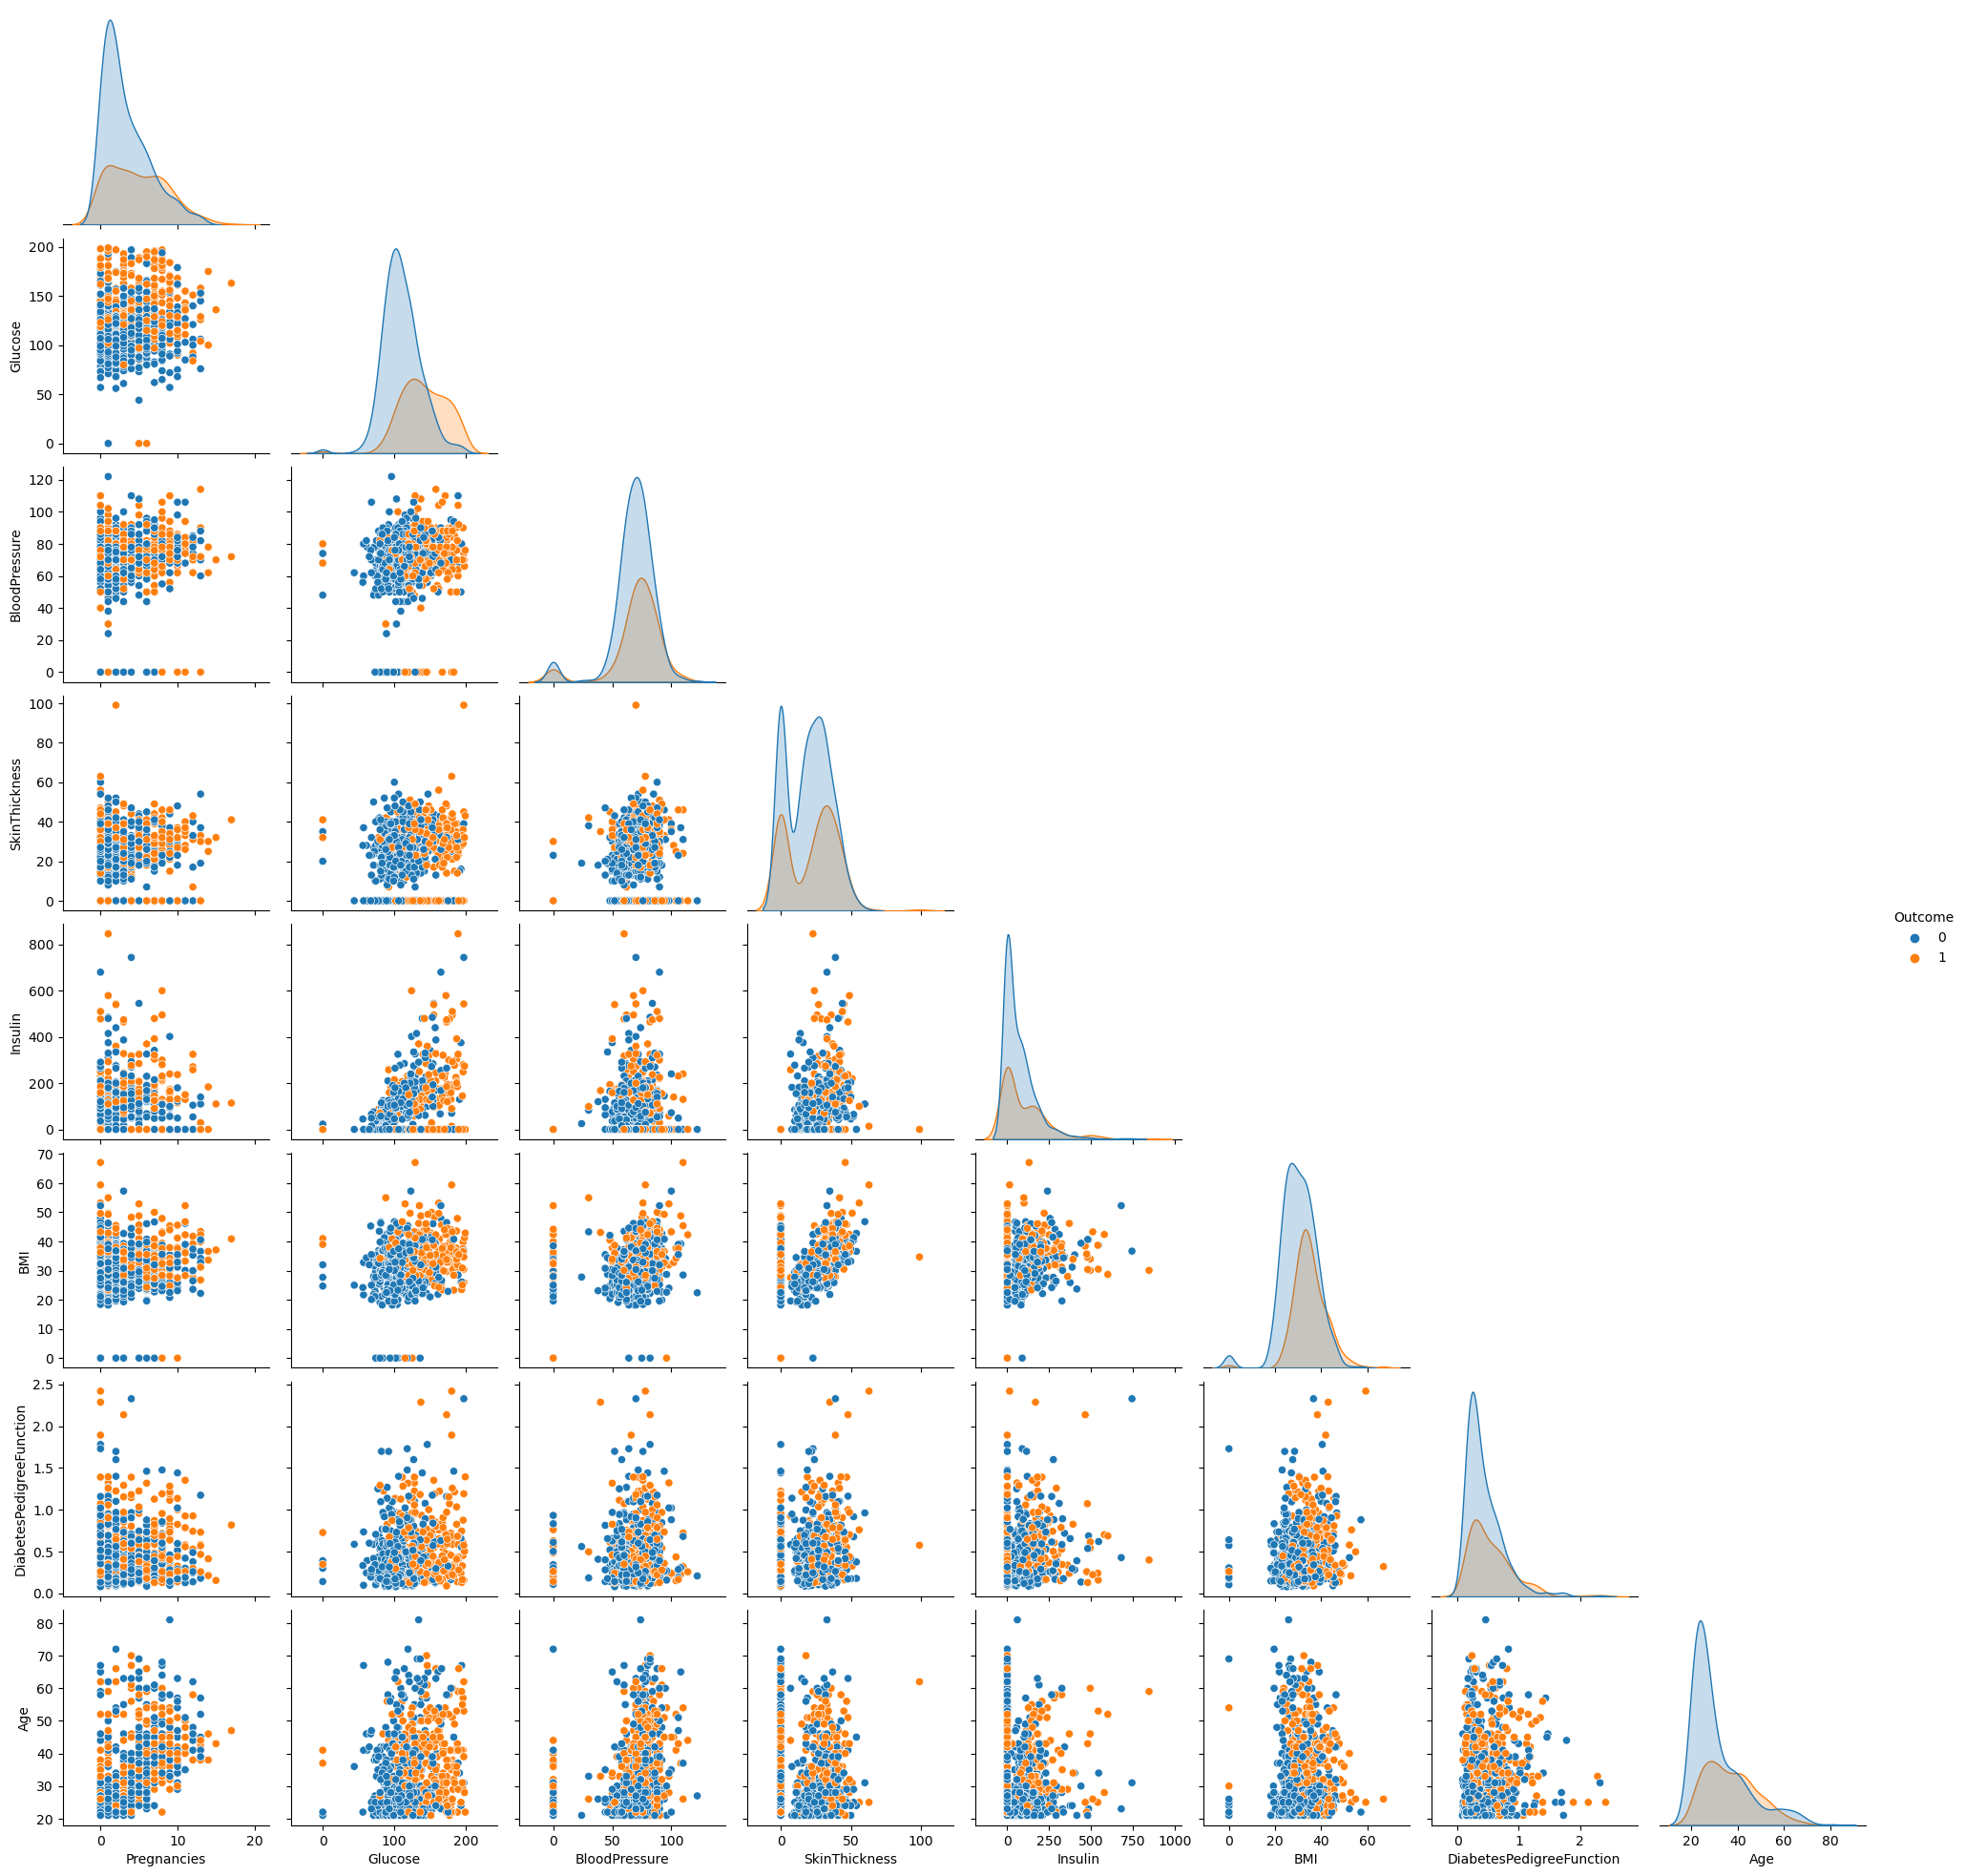

In [4]:
sns.pairplot(df, hue = "Outcome", corner=True);
# pairplot classificationda target labela gore her zaman bakmamiz gereken bir gorsel
# hem kdeplotlar hem scatterplotlar classlar arası ustuste binmeleri gosteriyor.
# model yuksek ihtimalle bu icice gecmis ara noktalarda hata yapabilecektir.

# pairplot amaci gruplar ayrilmis mi, icice gecme durumlari vb ilk insightlar

## Train | Test Split

In [5]:
X=df.drop(["Outcome"], axis=1)
y=df["Outcome"]

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

# classification datalarını train ve test setlerine ayırırken eğer datamız inbalanced ise stratify=y parametresini
# mutlaka kullanmalıyız. Stratify parametresi 0 ve 1 classlarının birbirine olan oranını hem train datasında hemde test 
# datasında korur.

# Inbalanced datalarda bu parametre kullanılmaz ise az olan class train veya test setine dengesiz bir şekilde dağıtılabilir. 
# Bu da doğal olarak inbalanced olan classın scorlarını düşürür.
# stratify = y, daadaki dagili nasilsa train ve testte de ona esit bir dagilim yapiyor. imbalanced ise datada mutlaka,
# balancedda da tercihne kullanılabilir. 

# Datanız balanced da olsa inbalanced da olsa hepsinde stratify=y kullanabilirsiniz.

In [8]:
print(y.value_counts(normalize=True))
print()
print(y_train.value_counts(normalize=True))
print()
print(y_test.value_counts(normalize=True))

#train setine %80, test setine %20 olacak şekilde targetların dağıtımını yapmış

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

0    0.651466
1    0.348534
Name: Outcome, dtype: float64

0    0.649351
1    0.350649
Name: Outcome, dtype: float64


## Modelling with Pipeline

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [10]:
from sklearn.pipeline import Pipeline

operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

# pipelinemızı kuruyoruz.

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [11]:
y_pred = pipe_model.predict(X_test)

In [12]:
y_pred_proba = pipe_model.predict_proba(X_test)
# probability degerlerini aliyoruz her bir classin

In [29]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:,1]  # diabet olup olmadigini tespit etmek icin 1 classını alıyoruz sadece
test_data.sample(10)

# test datamıza pred ve pred_proba featurlarını ilave ederek modelin prediction işlemini nasıl yaptığını tekrar gözlemliyoruz.
# ilk satirda 0 iken 0 tahmin etmis. 0.11 proba demek aslinda 89% olasılık ile demek. prob'u 1e gore hesaplariz hep

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,pred,pred_proba
226,0,101,76,0,0,35.7,0.198,26,0,0,0.110296
174,2,75,64,24,55,29.7,0.370,33,0,0,0.045362
68,1,95,66,13,38,19.6,0.334,25,0,0,0.028764
235,4,171,72,0,0,43.6,0.479,26,1,1,0.889061
354,3,90,78,0,0,42.7,0.559,21,0,0,0.246884
586,8,143,66,0,0,34.9,0.129,41,1,1,0.651778
297,0,126,84,29,215,30.7,0.520,24,0,0,0.144994
476,2,105,80,45,191,33.7,0.711,29,1,0,0.159160
414,0,138,60,35,167,34.6,0.534,21,1,0,0.353692
511,0,139,62,17,210,22.1,0.207,21,0,0,0.102105


## Model Performance on Classification Tasks

In [13]:
from sklearn.metrics import confusion_matrix, classification_report

In [14]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

# eval_metric fonksiyonumuzu tanımlıyoruz.

In [32]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

# 1 classına ait gözlemler daha az olduğundan scorların 0 classına nazaran daha düşük olduğunu görebiliyoruz.
# Ama her inbalanced data da scorların bu şekilde olmayabileceğini de unutmuyoruz.
# data imabalanced oldugu icin (20+29 toplam actual true 49 iken false 95) tam ogrenememis 1 sinifini. 

# train test karsilastirmasindan overfiting olmadığınıda dair bir insight alıyoruz ama kesin kararımızı CV 
# sonrası vereceğiz.

# precision: Bizim diabet dediklerimizin kaçta kaçı aslında diyabet, yani predictlerimizin dogrulugu (29/39: 0.74)

# imbalanced oldugu icin accuracy'e cok bakmiyoruz, recall precision ve f1 uzerinden gidiyoruz.

Test_Set
[[85 10]
 [20 29]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        95
           1       0.74      0.59      0.66        49

    accuracy                           0.79       144
   macro avg       0.78      0.74      0.75       144
weighted avg       0.79      0.79      0.79       144


Train_Set
[[337  41]
 [ 89 109]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       378
           1       0.73      0.55      0.63       198

    accuracy                           0.77       576
   macro avg       0.76      0.72      0.73       576
weighted avg       0.77      0.77      0.77       576



## Cross Validate

In [15]:
from sklearn.model_selection import cross_validate

In [34]:
from sklearn.model_selection import StratifiedKFold

# stratifiedkfold datayi bolerken her bolumde 0-1 class oranlarını esit daagitiyor
# imbalanced data ise stratifiedkfold kullanabiliriz.

operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

model = Pipeline(steps=operations)

cv = StratifiedKFold(n_splits=10) # her iterasyonda train ve test setlerinin birbirlerine olan oranlarına göre tüm 
                                  # iterasyonlarda ayrışım yapar.

scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], 
                        cv = cv, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1,11))
df_scores

# 3. ve 4. iterasyondaki test_precision scorları diğer iterasyondaki skorlardan çok daha iyi çıkmış ancak aynı iterasyonlardaki
# train_precision scorları diğer iterasyonlarla benzer çıkmış. Bu durumlarla çok küçük datalarda sıklıkla karşılaşılır.

# Normalde tüm iterasyonlarda 3 aşağı 5 yukarı aynı skorlar beklenir.


,fit_time,score_time,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1,test_accuracy,train_accuracy
1,0.006602,0.005613,0.600000,0.718310,0.450000,0.573034,0.514286,0.637500,0.706897,0.776062
2,0.006421,0.008503,0.642857,0.744526,0.450000,0.573034,0.529412,0.647619,0.724138,0.785714
3,0.003016,0.005613,0.923077,0.717557,0.600000,0.528090,0.727273,0.608414,0.844828,0.766409
4,0.005686,0.003979,0.857143,0.716418,0.600000,0.539326,0.705882,0.615385,0.827586,0.768340
5,0.004576,0.003689,0.705882,0.727941,0.600000,0.556180,0.648649,0.630573,0.775862,0.776062
6,0.004681,0.003968,0.647059,0.727941,0.550000,0.556180,0.594595,0.630573,0.741379,0.776062
7,0.004102,0.004021,0.714286,0.723881,0.526316,0.541899,0.606061,0.619808,0.771930,0.770713
8,0.005090,0.004217,0.647059,0.719424,0.578947,0.558659,0.611111,0.628931,0.754386,0.772640
9,0.003572,0.004015,0.733333,0.698529,0.550000,0.533708,0.628571,0.605096,0.771930,0.761079
10,0.004105,0.003989,0.625000,0.729927,0.500000,0.561798,0.555556,0.634921,0.719298,0.778420


In [35]:
df_scores.mean()[2:]

# overfiting olmadığını görüyoruz.
# overfit olmadigi yonunde insight elde ediyoruz. bunlar her zaman 1 classına ait skorlar

test_precision     0.709570
train_precision    0.722445
test_recall        0.540526
train_recall       0.552191
test_f1            0.612139
train_f1           0.625882
test_accuracy      0.763823
train_accuracy     0.773150
dtype: float64

In [36]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

# test datasındaki 1 classına ait scorlar ile CV scorlarının tutarlı olduğunu görüyoruz.

Test_Set
[[85 10]
 [20 29]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        95
           1       0.74      0.59      0.66        49

    accuracy                           0.79       144
   macro avg       0.78      0.74      0.75       144
weighted avg       0.79      0.79      0.79       144


Train_Set
[[337  41]
 [ 89 109]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       378
           1       0.73      0.55      0.63       198

    accuracy                           0.77       576
   macro avg       0.76      0.72      0.73       576
weighted avg       0.77      0.77      0.77       576



## Cross Validate for 0 class

In [37]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

f1_0 = make_scorer(f1_score, pos_label =0)
precision_0 = make_scorer(precision_score, pos_label =0)
recall_0 = make_scorer(recall_score, pos_label =0)

scoring = {"precision_0":precision_0, "recall_0":recall_0, "f1_0":f1_0}

# 0 clasının CV skorlarına bakmak için make_scorer fonksiyonunu kullanıyoruz. make_scorer içerisine metric fonksiyonlarına
# ait parametreleri make_scorer içerisine yazabiliyoruz.
# make_scorer'a eşitlediğimiz metricleri mutlaka bir dictionary içerisinde tanımlayıp bir değişkene (scoring) atıyoruz.

In [38]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

model = Pipeline(steps=operations)

cv = StratifiedKFold(n_splits=10)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = cv, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

# scoring parametresine yukarda tanımladığımız scoring değişkenini vererek 
# 0 classına ait metric scorlarını alabiliyoruz. Overfitting olmadığını görüyoruz.

test_precision_0     0.785247
train_precision_0    0.791241
test_recall_0        0.880868
train_recall_0       0.888891
test_f1_0            0.830052
train_f1_0           0.837217
dtype: float64

In [39]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

# test setindeki 0 classına ait scorlar ile tutarlı olduğunu görüyoruz.

Test_Set
[[85 10]
 [20 29]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        95
           1       0.74      0.59      0.66        49

    accuracy                           0.79       144
   macro avg       0.78      0.74      0.75       144
weighted avg       0.79      0.79      0.79       144


Train_Set
[[337  41]
 [ 89 109]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       378
           1       0.73      0.55      0.63       198

    accuracy                           0.77       576
   macro avg       0.76      0.72      0.73       576
weighted avg       0.77      0.77      0.77       576



## GridSearchCV

In [40]:
pipe_model.get_params()

# gridsearchCV içerisinde eğer pipeline modeli kullanacaksak pipeline içerisine tanımlanmış olan ML algoritmasına ait
# hyper_parametrelerin listesini get_params() ile görebiliyoruz.

# gridsearchCvnin param_grid parametrresinin içine yazacağımız hyper_parametreleri aşağıda belirtildiği haliyle yazmalıyız.

# Dikkaet ederseniz pipelien içerisinde ML modeline verdiğimiz "logistic" isminden sonra 2 tane alt tire(__) sonra
# ML modelinin kendi hyper parametre isminin yazdığına dikkat edin.

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('logistic', LogisticRegression())],
 'verbose': False,
 'scaler': StandardScaler(),
 'logistic': LogisticRegression(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'logistic__C': 1.0,
 'logistic__class_weight': None,
 'logistic__dual': False,
 'logistic__fit_intercept': True,
 'logistic__intercept_scaling': 1,
 'logistic__l1_ratio': None,
 'logistic__max_iter': 100,
 'logistic__multi_class': 'auto',
 'logistic__n_jobs': None,
 'logistic__penalty': 'l2',
 'logistic__random_state': None,
 'logistic__solver': 'lbfgs',
 'logistic__tol': 0.0001,
 'logistic__verbose': 0,
 'logistic__warm_start': False}

In [41]:
pipe_model.set_params(logistic__C= 1)

# pipelien modelin içerisindeki herhangi bir hyperparametreyi değiştirmek için set_params() fonksiyonunu kullanabiliriz.
# set_params() içerisine değiştirmek istediğimiz hyper_parametreyi ve eşitlemek istediğimiz değeri yazıyoruz.

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression(C=1))])

In [42]:
pipe_model.get_params()

# yaptığımız değişikliği kontrol için tekrar get_params() ile bakabiliyoruz.
# en önemli parametre  logistic__C': 1. alpha arttikca lin.de regularization artiyordu,
# burda ise tam tersi, read doc string.. solver ve penalty de onemlierden bazilari
# en iyi parametreyi bulmak icin gridsearch() yapiyoruz

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('logistic', LogisticRegression(C=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'logistic': LogisticRegression(C=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'logistic__C': 1,
 'logistic__class_weight': None,
 'logistic__dual': False,
 'logistic__fit_intercept': True,
 'logistic__intercept_scaling': 1,
 'logistic__l1_ratio': None,
 'logistic__max_iter': 100,
 'logistic__multi_class': 'auto',
 'logistic__n_jobs': None,
 'logistic__penalty': 'l2',
 'logistic__random_state': None,
 'logistic__solver': 'lbfgs',
 'logistic__tol': 0.0001,
 'logistic__verbose': 0,
 'logistic__warm_start': False}

In [43]:
from sklearn.model_selection import GridSearchCV

operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

model = Pipeline(steps=operations)

penalty = ["l1", "l2"]
C = [0.01, 0.1, 1, 5]
class_weight= ["balanced", None] 

# dengesiz data setlerinde classları dengelemek için class_weight= "balanced" kullanabiliyoruz. Data dengelendiği zaman
# model az olan sınıfa ait precision scorunu artırarak o sınıfın recall scorunu artırmaya çalışır.

# The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies 
# in the input data
solver = ["lbfgs", "liblinear", "sag", "saga"]

param_grid = {"logistic__penalty" : penalty,
              "logistic__C" : C,
              "logistic__class_weight":class_weight,
              "logistic__solver":solver}



cv = StratifiedKFold(n_splits = 10) #shuffle = True, random_state = 42

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=cv,
                          scoring = "recall",   #0 classı icin: f1_0 = make_scorer(f1_score, pos_label =0)
                          n_jobs = -1, # cok sayida parametre deneyecegi icin bunu verip tum pc buna
                          return_train_score=True)

# GrdiseachCV aynı zamanda Cross Validation işlemi de yaptığı için validation ve train seti scorlarını elde edebilmek için
# return_train_score=True olarak belirtiyoruz. (scoring karşına yazdığımız metric scorunu döndürür sadece)

In [44]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.01, 0.1, 1, 5],
                         'logistic__class_weight': ['balanced', None],
                         'logistic__penalty': ['l1', 'l2'],
                         'logistic__solver': ['lbfgs', 'liblinear', 'sag',
                                              'saga']},
             return_train_score=True, scoring='recall')

In [45]:
grid_model.best_estimator_

# best_estimator_ default hyper_parametreleri döndürmez sadece defaut değerlerden farklı olanları döndürür.

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    penalty='l1', solver='liblinear'))])

In [46]:
pd.DataFrame(grid_model.cv_results_).loc[grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

# ilgili df'in best indexinden "mean_test_score" ile "mean_train_score" ları çekilip karşılaştırılırak overfitig,
# underfiting değerlendirilmesi yapılır. 

# GridsearchCV aynı zamanda Cross validation işlemi de yaptığından extradan cross validation yapmamıza gerek yok.

# Burda aldığımız scorelar gridsearchcv içerisine verdiğimiz scoring metricinin scorelarıdır.

# asagidaki scorelar recall, cunku gridsearche recall verdik. 

mean_test_score     0.737895
mean_train_score      0.7514
Name: 17, dtype: object

In [47]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

# test setinin recall scorları ile gridseracCV recall scoru tutarlı
# scorelar iyilesmis. ornegin daha oncekinde 29 bilmisken simdi 36 olmus
# precisionda biraz dusus var, normal cunku precision ve recall arasi tradeoff var, recaalu kullandik biz
# overfit olmadigini da goruyoruz

Test_Set
[[76 19]
 [13 36]]
              precision    recall  f1-score   support

           0       0.85      0.80      0.83        95
           1       0.65      0.73      0.69        49

    accuracy                           0.78       144
   macro avg       0.75      0.77      0.76       144
weighted avg       0.79      0.78      0.78       144


Train_Set
[[288  90]
 [ 49 149]]
              precision    recall  f1-score   support

           0       0.85      0.76      0.81       378
           1       0.62      0.75      0.68       198

    accuracy                           0.76       576
   macro avg       0.74      0.76      0.74       576
weighted avg       0.78      0.76      0.76       576



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

https://towardsdatascience.com/calculating-and-setting-thresholds-to-optimise-logistic-regression-performance-c77e6d112d7e

In [50]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, roc_auc_score, roc_curve,\
                            average_precision_score, precision_recall_curve

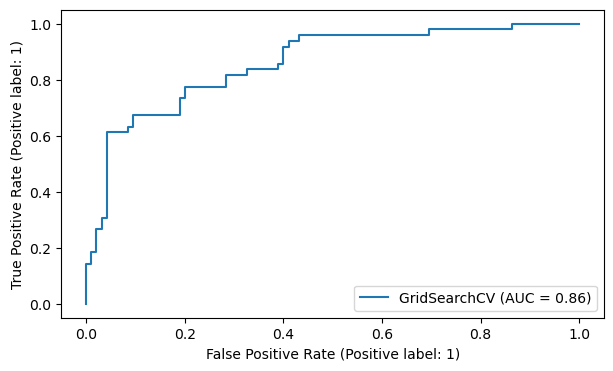

In [51]:
RocCurveDisplay.from_estimator(grid_model, X_test, y_test);

# Alternative way:
# y_test_pred_proba=grid_model.predict_proba(X_test)[:,1]
# RocCurveDisplay.from_predictions(y_test, y_test_pred_proba, pos_label=1);

# datamızın AUC scoru 0.86
# 0 ve 1 ayrismasini gormek icin; bir de farkli modelleri karsilastirip en iyisini secmek icin roc curve kullaniriz

## Precision Recall Curve

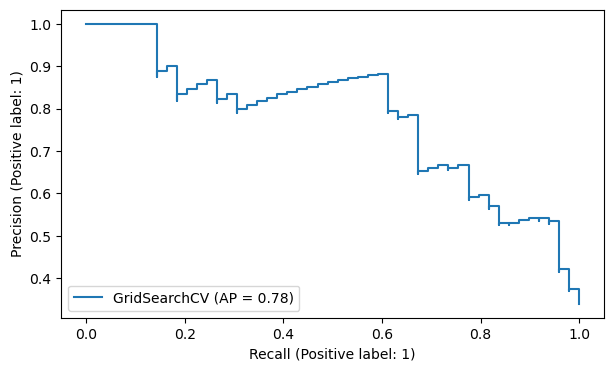

In [62]:
PrecisionRecallDisplay.from_estimator(grid_model, X_test, y_test);

# alternative way:
# PrecisionRecallDisplay.from_predictions(y_test, y_test_pred_proba);

# datamızın AUC scoru 0.86 iken average precision scoru 0.78. Datamız imbalanced olduğundan average precision scorunu dikkate
# alıyoruz. Gördüğünüz gibi AUC scoru çok daha iyimser bir score döndürüyor.

## Finding Best Thresholds

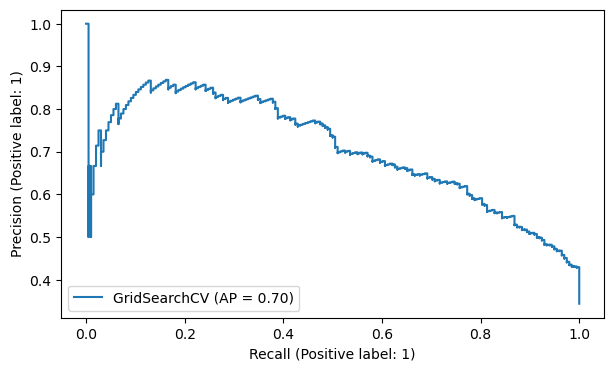

In [64]:
PrecisionRecallDisplay.from_estimator(grid_model, X_train, y_train);

# Müşterinin talep ettiği scorları alabilmek için hangi thresholda hangi precision ve recall scorlarını alabildiğimizi 
# görebiliyoruz. 

# Data leakege önlemek için müşterinin talep ettiği metriclere denk gelen en iyi thresholdu tarin datası üzerinden
# bulmamız gerektiğini unutmuyoruz.

In [65]:
y_train_pred_proba = grid_model.predict_proba(X_train)
average_precision_score(y_train, y_train_pred_proba[:,1])

0.7039681099671158

In [66]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_train_pred_proba[:,1])

# precision_recall_curve bize precision, recall ve threshold değerlerini döndürür.

In [68]:
print("precision :", len(precisions))
print("recall    :", len(recalls))
print("threshold :", len(thresholds))
# threshold 0 ile 1 dir aslinda. bu 577 ve 576lar gozelm sayisi. koddaki bug nedeniyle 1 eksik gosteriyor
# bu ndenele hepsi esit olsun diye asagida diger ikisini de 1er eksik yapacagiz

precision : 577
recall    : 577
threshold : 576


In [69]:
dict = {"precisions":precisions[:-1], "recalls":recalls[:-1], "threshold":thresholds}
df_metric = pd.DataFrame(dict).sort_values(by = ["recalls", "precisions"], ascending=False)
df_metric

# precision ve recall değerleri thresholdan 1 eksik olduğundan precision ve recall değerlerinin en sonuncu değerlerini
# ignore ediyoruz.

# df_metric scorlarını önce recalls sonra precision scorlarına göre sıralıyoruz.

# Burdaki yaptığımız sıralama hedeflediğimiz recall scoruna denk gelen en yüksek precision scorunu da döndürür.

# hedefimiz 1.0 recall olduğuna göre 1.0 recall'u max 0.429501 precision scoru ile elde edebiliyoruz. Hedefimizin her zaman
# max recall scoru, max precision score ile elde etmek olduğunu unutmayın.

# optimal thresholdumuz 0.224458'dir.

# recall 1 classını dogru tespit etme orani. 1 olmasi hepsini dogru tespit etmek demek, hic hata yok demek
# ame recall ve precision arasi bir denge aradigimiz icin 1 olmasini istemeyiz.
# eger sadece diyabetleri yakalayayim gerisi onemli degil denirse recall 1 olabilir; ama cost-effective bir sonuc
# istenir genelde. maliyet de falselarla (diagonal olmayan) hesaplanir. domain knowledge gerekir bunun icin.

# biz sanki musteri bunu istiyormus gibi 0.2244 sectik bu ornekte

,precisions,recalls,threshold
115,0.429501,1.000000,0.224458
114,0.428571,1.000000,0.222723
113,0.427646,1.000000,0.221423
112,0.426724,1.000000,0.217896
111,0.425806,1.000000,0.216199
110,0.424893,1.000000,0.215575
109,0.423983,1.000000,0.214829
108,0.423077,1.000000,0.212996
107,0.422175,1.000000,0.211465
106,0.421277,1.000000,0.211121


In [70]:
optimal_threshold = 0.224458

In [71]:
class_1_proba = grid_model.predict_proba(X_test)[:,1]
class_1_proba

# 1 classına ait olasılıkları elde ettikten sonra 0.5 threshold yerine yukarda bulduğumuz 0.224454 optimal_thrshold değerini
# kullanacağız.

array([0.86114257, 0.91895437, 0.54015956, 0.32834428, 0.84587254,
       0.19021285, 0.37230251, 0.89304998, 0.09179873, 0.23758106,
       0.42218728, 0.40049644, 0.3215219 , 0.29623267, 0.91147697,
       0.04580285, 0.3148457 , 0.77838842, 0.60683847, 0.1750195 ,
       0.59128093, 0.07183563, 0.85620122, 0.26773191, 0.35900193,
       0.42662907, 0.21360268, 0.54007729, 0.47725205, 0.26626817,
       0.32224062, 0.47416731, 0.59969874, 0.29606551, 0.92993792,
       0.16407473, 0.56706191, 0.37505899, 0.66446167, 0.17883215,
       0.22570795, 0.10909556, 0.11562461, 0.76815203, 0.45678844,
       0.48416983, 0.45125518, 0.8419933 , 0.89861686, 0.48443644,
       0.31847576, 0.22797946, 0.45359615, 0.06128317, 0.08594104,
       0.8789684 , 0.65055923, 0.21427426, 0.72031002, 0.53912074,
       0.81871544, 0.62134118, 0.76003652, 0.91815701, 0.84383373,
       0.17311844, 0.33797485, 0.36854683, 0.9633858 , 0.10317999,
       0.50367602, 0.22026559, 0.7670316 , 0.24150137, 0.65058

In [72]:
y_pred2 = [1 if i >= optimal_threshold else 0 for i in class_1_proba]

# optimal thresholda göre sınıf atamalarını yapıyoruz. Ve yaptığımız bu sınıf atamalarını y_pred2'ye atıyoruz.

In [73]:
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

# recall 0.98 oldu ama 0 sinifinda 0.31e dustu. yani hasta olmayanlara dahi diabetli demisiz. 
# Max recall'u mümkün olan en yüksek precision değerleriyle birlikte elde etmeye çalışıyoruz.

[[29 66]
 [ 1 48]]
              precision    recall  f1-score   support

           0       0.97      0.31      0.46        95
           1       0.42      0.98      0.59        49

    accuracy                           0.53       144
   macro avg       0.69      0.64      0.53       144
weighted avg       0.78      0.53      0.51       144



In [74]:
class_1_proba_train = grid_model.predict_proba(X_train)[:,1]

y_train_pred2 = [1 if i >= optimal_threshold else 0 for i in class_1_proba_train]

print(confusion_matrix(y_train, y_train_pred2))
print(classification_report(y_train, y_train_pred2))

# aynı işlemi train seti içinde yapıyoruz.

[[115 263]
 [  1 197]]
              precision    recall  f1-score   support

           0       0.99      0.30      0.47       378
           1       0.43      0.99      0.60       198

    accuracy                           0.54       576
   macro avg       0.71      0.65      0.53       576
weighted avg       0.80      0.54      0.51       576



In [75]:
from sklearn.model_selection import StratifiedKFold

def CV(n, model, X, y, optimal_threshold=0.224463):
    skf = StratifiedKFold(n_splits = n) #shuffle = True, random_state = 42
    
    acc_scores = []
    test_pre_scores = []
    test_rec_scores = []
    test_f1_scores  = []
    
    train_pre_scores = []
    train_rec_scores = []
    train_f1_scores  = []
    
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    
    for train_index, test_index in skf.split(X, y):
        
        X_train = X.loc[train_index]
        y_train = y.loc[train_index]
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        
        
        model = model
        model.fit(X_train, y_train)
        
        y_pred_proba = model.predict_proba(X_test)[:,1]
        y_pred2 = [1 if i >= optimal_threshold else 0 for i in y_pred_proba]
        
        
        y_train_pred_proba = model.predict_proba(X_train)[:,1]
        y_train_pred2 = [1 if i >= optimal_threshold else 0 for i in y_train_pred_proba]
        
        acc_scores.append(accuracy_score(y_test, y_pred2))
        
        test_pre_scores.append(precision_score(y_test, y_pred2, pos_label=1))
        test_rec_scores.append(recall_score(y_test, y_pred2, pos_label=1))
        test_f1_scores.append(f1_score(y_test, y_pred2, pos_label=1))
        
        train_pre_scores.append(precision_score(y_train, y_train_pred2, pos_label=1))
        train_rec_scores.append(recall_score(y_train, y_train_pred2, pos_label=1))
        train_f1_scores.append(f1_score(y_train, y_train_pred2, pos_label=1))
    
    print(f'Accuracy {np.mean(acc_scores)*100:>15,.2f}%  std {np.std(acc_scores)*100:.2f}%\n')
    
    print(f'Test_Precision-1 {np.mean(test_pre_scores)*100:>7,.2f}%  std {np.std(test_pre_scores)*100:.2f}%')
    print(f'Train_Precision-1 {np.mean(train_pre_scores)*100:>6,.2f}%  std {np.std(train_pre_scores)*100:.2f}%\n')
    
    print(f'Test_Recall-1 {np.mean(test_rec_scores)*100:>10,.2f}%  std {np.std(test_rec_scores)*100:.2f}%')
    print(f'Train_Recall-1 {np.mean(train_rec_scores)*100:>9,.2f}%  std {np.std(train_rec_scores)*100:.2f}%\n')
    
    print(f'Test_F1_score-1 {np.mean(test_f1_scores)*100:>8,.2f}%  std {np.std(test_f1_scores)*100:.2f}%')
    print(f'Train_F1_score-1 {np.mean(train_f1_scores)*100:>7,.2f}%  std {np.std(train_f1_scores)*100:.2f}%')
    
# optimal threshold için bildiğimiz classic Cross validation fonksiyonunu kullanamıyoruz. O yüzden burda manuel olarak yazdığımız
# kodu kullanıyoruz. Scorlarla birlikte scorların standart sapamasına bakma sebebimiz, skorların birbirleriyle ne kadar benzer
# olduğunu görebilmek 

In [76]:
model = LogisticRegression(C=0.1, class_weight='balanced', penalty='l1', solver='liblinear')
CV(10, model, X_train, y_train)

# recaller 96-97 yani overfit yok

Accuracy           41.13%  std 2.89%

Test_Precision-1   36.52%  std 1.55%
Train_Precision-1  36.77%  std 0.49%

Test_Recall-1      96.47%  std 4.51%
Train_Recall-1     97.03%  std 0.26%

Test_F1_score-1    52.97%  std 2.12%
Train_F1_score-1   53.33%  std 0.53%


## Final Model and Model Deployment

In [77]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression(C=0.1, class_weight='balanced',
                                                         penalty='l1', solver='liblinear'))]

final_model = Pipeline(steps=operations)

final_model.fit(X, y)

# final modeli bulduğumuz en iyi hyper parametrelerle kuruyoruz.

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    penalty='l1', solver='liblinear'))])

In [78]:
import pickle
pickle.dump(final_model, open("final_pipe_model", 'wb'))

In [79]:
new_model = pickle.load(open("final_pipe_model", "rb"))

In [80]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,720.0,3.880556,3.366308,0.000,1.000,3.000,6.0000,17.00
Glucose,720.0,121.897222,30.649311,44.000,100.000,117.000,142.0000,199.00
BloodPressure,720.0,72.588889,12.075234,38.000,64.000,72.000,80.0000,122.00
SkinThickness,720.0,21.287500,15.476731,0.000,0.000,24.000,33.0000,63.00
Insulin,720.0,84.676389,117.276853,0.000,0.000,48.000,132.0000,846.00
BMI,720.0,32.424167,6.842008,18.200,27.475,32.350,36.6000,67.10
DiabetesPedigreeFunction,720.0,0.474885,0.333024,0.078,0.245,0.378,0.6295,2.42
Age,720.0,33.338889,11.737350,21.000,24.000,29.000,41.0000,81.00


In [81]:
my_dict = {"Pregnancies": [3, 6, 5],
           "Glucose": [117, 140, 120],
           "BloodPressure": [72, 80, 75],
           "SkinThickness": [23, 33, 25],
           "Insulin": [48, 132, 55],
           "BMI": [32, 36.5, 34],
           "DiabetesPedigreeFunction": [0.38, 0.63, 0.45],
           "Age": [29, 40, 33]
          }

# min, max değerlere göre 3 adet gözlem belirliyoruz.

In [82]:
sample = pd.DataFrame(my_dict)
sample

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,3,117,72,23,48,32.0,0.38,29
1,6,140,80,33,132,36.5,0.63,40
2,5,120,75,25,55,34.0,0.45,33


In [83]:
sample_2 = sample.copy()

In [84]:
new_model.predict(sample)
# ilk ve sona degil ortadakine diabet dedi model

array([0, 1, 0], dtype=int64)

In [85]:
predictions = new_model.predict(sample)
predictions_proba = new_model.predict_proba(sample)
predictions2 = [1 if i >= optimal_threshold else 0 for i in predictions_proba[:,1]]


In [86]:
sample["pred_proba"] = predictions_proba[:,1]
sample["pred_0.50"] = predictions
sample["pred_0.22"] = predictions2
sample

# default 0.5 threshold ve optimal thresholda göre aldığımız predictionları aşağıda gözlemleyebilriz.
# 0.5 iken sadece ortadaki, 0.22 iken 3ünü de diabet predict etmis

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,pred_proba,pred_0.50,pred_0.22
0,3,117,72,23,48,32.0,0.38,29,0.367629,0,1
1,6,140,80,33,132,36.5,0.63,40,0.756707,1,1
2,5,120,75,25,55,34.0,0.45,33,0.497438,0,1


## New Predictions for optimal_threshols

In [87]:
def predict(model, X_test, optimal_threshold = 0.224454):
    
    predict_proba = model.predict_proba(X_test)
    
    prediction = [1 if i >= optimal_threshold else 0 for i in predict_proba[:,1]]
    
    return prediction

# optimal threshol için tanımladığımız predict fonksiyonu ile prediction alabiliriz.

In [88]:
sample_2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,3,117,72,23,48,32.0,0.38,29
1,6,140,80,33,132,36.5,0.63,40
2,5,120,75,25,55,34.0,0.45,33


In [89]:
y_pred = predict(final_model, sample_2)
y_pred

[1, 1, 1]